Stock price prediction using LSTM

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Load the Training Dataset.=
dataset_train = pd.read_csv("NFL.NS.csv")
dataset_train = dataset_train.dropna()
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,53.450001,56.799999,52.500000,55.349998,46.208496,156211.0
1,2012-01-04,55.599998,64.400002,54.799999,62.849998,52.469810,706876.0
2,2012-01-05,63.000000,66.500000,62.849998,65.800003,54.932598,616330.0
3,2012-01-06,65.400002,69.199997,64.800003,67.599998,56.435307,599300.0
5,2012-01-09,82.500000,87.050003,79.599998,82.800003,69.124908,1955697.0


In [13]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2016-12-23,34.049999,35.099998,33.750000,34.700001,30.571991,206486.0
1229,2016-12-26,35.099998,35.349998,33.200001,33.400002,29.426645,432981.0
1230,2016-12-27,34.000000,34.200001,33.450001,33.950001,29.911213,215960.0
1231,2016-12-28,34.200001,34.450001,33.849998,33.950001,29.911213,98424.0
1232,2016-12-29,34.099998,35.900002,33.849998,35.250000,31.056562,507062.0


In [14]:
#Use the Open Stock Price Column to Train Your Model
training_set = dataset_train.iloc[:,1:2].values
print(training_set[:5])
print(training_set.shape)

[[53.450001]
 [55.599998]
 [63.      ]
 [65.400002]
 [82.5     ]]
(1227, 1)


In [15]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set[:5])

[[0.45213454]
 [0.47994821]
 [0.57567915]
 [0.60672704]
 [0.82794305]]


In [18]:
#Creating X_train and y_train
X_train = []
y_train = []
for i in range(60, 1227):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1167, 60)
(1167,)


In [19]:
#Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(1167, 60, 1)


In [20]:
#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [21]:
#fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train,y_train,epochs = 50, batch_size=32)

Epoch 1/50
37/37 [==============================] - 22s 229ms/step - loss: 0.0168
Epoch 2/50
37/37 [==============================] - 8s 226ms/step - loss: 0.0043
Epoch 3/50
37/37 [==============================] - 8s 219ms/step - loss: 0.0047
Epoch 4/50
37/37 [==============================] - 8s 214ms/step - loss: 0.0036
Epoch 5/50
37/37 [==============================] - 8s 211ms/step - loss: 0.0038
Epoch 6/50
37/37 [==============================] - 8s 209ms/step - loss: 0.0040
Epoch 7/50
37/37 [==============================] - 8s 204ms/step - loss: 0.0035
Epoch 8/50
37/37 [==============================] - 8s 205ms/step - loss: 0.0032
Epoch 9/50
37/37 [==============================] - 8s 211ms/step - loss: 0.0032
Epoch 10/50
37/37 [==============================] - 8s 212ms/step - loss: 0.0027
Epoch 11/50
37/37 [==============================] - 8s 214ms/step - loss: 0.0028
Epoch 12/50
37/37 [==============================] - 8s 228ms/step - loss: 0.0030
Epoch 13/50
37/37 [=====

In [22]:
#Extracting the Actual Stock Prices

dataset_test = pd.read_csv("NFL.NS (2).csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

print(dataset_test.shape)

print(dataset_test[:5])
print(actual_stock_price)

(20, 7)
         Date       Open       High        Low      Close  Adj Close   Volume
0  2017-01-02  35.500000  36.450001  34.900002  36.150002  31.849495   394163
1  2017-01-03  35.950001  36.400002  35.599998  35.900002  31.629238   217757
2  2017-01-04  36.250000  38.400002  36.000000  38.049999  33.523468  2113440
3  2017-01-05  38.250000  39.650002  37.450001  38.950001  34.316399  2332403
4  2017-01-06  38.900002  40.400002  37.599998  40.049999  35.285538  2472387
[[35.5     ]
 [35.950001]
 [36.25    ]
 [38.25    ]
 [38.900002]
 [40.      ]
 [42.950001]
 [43.5     ]
 [43.150002]
 [43.900002]
 [44.400002]
 [47.349998]
 [47.      ]
 [46.200001]
 [45.900002]
 [43.75    ]
 [44.400002]
 [45.700001]
 [46.950001]
 [47.650002]]


In [27]:
#Preparing the Input for the Model.
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

# print(dataset_total.shape)
print(inputs.shape)
# print(actual_stock_price)

inputs = inputs.reshape(-1,1)
# print(inputs)
inputs = scaler.transform(inputs)

#print(inputs)


(80,)
[[33.200001]
 [33.299999]
 [33.650002]
 [33.400002]
 [33.25    ]
 [33.950001]
 [33.900002]
 [33.049999]
 [32.700001]
 [33.349998]
 [33.849998]
 [36.599998]
 [34.450001]
 [33.75    ]
 [34.349998]
 [35.5     ]
 [35.099998]
 [35.150002]
 [35.599998]
 [35.200001]
 [35.200001]
 [35.400002]
 [34.349998]
 [34.650002]
 [33.400002]
 [33.75    ]
 [33.700001]
 [34.25    ]
 [32.650002]
 [32.049999]
 [31.6     ]
 [31.1     ]
 [30.4     ]
 [29.85    ]
 [29.9     ]
 [30.5     ]
 [30.9     ]
 [32.400002]
 [33.      ]
 [33.400002]
 [32.599998]
 [33.200001]
 [33.200001]
 [32.849998]
 [37.549999]
 [36.849998]
 [35.200001]
 [34.400002]
 [35.349998]
 [34.349998]
 [35.150002]
 [33.799999]
 [34.549999]
 [34.150002]
 [34.25    ]
 [34.049999]
 [35.099998]
 [34.      ]
 [34.200001]
 [34.099998]
 [35.5     ]
 [35.950001]
 [36.25    ]
 [38.25    ]
 [38.900002]
 [40.      ]
 [42.950001]
 [43.5     ]
 [43.150002]
 [43.900002]
 [44.400002]
 [47.349998]
 [47.      ]
 [46.200001]
 [45.900002]
 [43.75    ]
 [44.4

C:\Users\harsh\AppData\Local\Temp\ipykernel_18788\3652376527.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values


In [30]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)



(20, 60, 1)


In [31]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


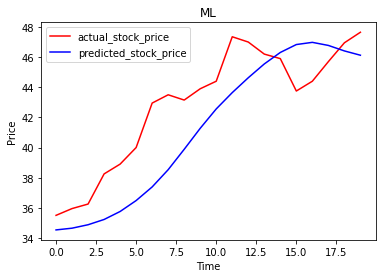

In [33]:
plt.plot(actual_stock_price, color = 'red',label='actual_stock_price')
plt.plot(predicted_stock_price, color = 'blue',label='predicted_stock_price')
plt.title('ML')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()